In [109]:
!pip install openai

In [140]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
import openai

In [111]:
csv_filmes = '/content/drive/MyDrive/WETTO/MoviesOnStreamingPlatforms.csv'
dados_filmes = pd.read_csv(csv_filmes)

In [112]:
dados_filmes.head()

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


In [113]:
dados_filmes.isnull().sum()

Unnamed: 0            0
ID                    0
Title                 0
Year                  0
Age                4177
Rotten Tomatoes       7
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
dtype: int64

In [114]:
colunas_para_drop = ['Unnamed: 0', 'ID', 'Age', 'Rotten Tomatoes', 'Type']
dados_filmes.drop(columns=colunas_para_drop, axis=1, inplace=True)

In [115]:
dados_filmes.head()

,Title,Year,Netflix,Hulu,Prime Video,Disney+
0,The Irishman,2019,1,0,0,0
1,Dangal,2016,1,0,0,0
2,David Attenborough: A Life on Our Planet,2020,1,0,0,0
3,Lagaan: Once Upon a Time in India,2001,1,0,0,0
4,Roma,2018,1,0,0,0


In [116]:
dados_netflix = dados_filmes.loc[dados_filmes['Netflix'] == 1]

In [117]:
dados_hulu = dados_filmes.loc[dados_filmes['Hulu'] == 1]

In [118]:
dados_prime_video = dados_filmes.loc[dados_filmes['Prime Video'] == 1]

In [119]:
dados_disney_plus = dados_filmes.loc[dados_filmes['Disney+'] == 1]

In [120]:
len(dados_netflix)

3695

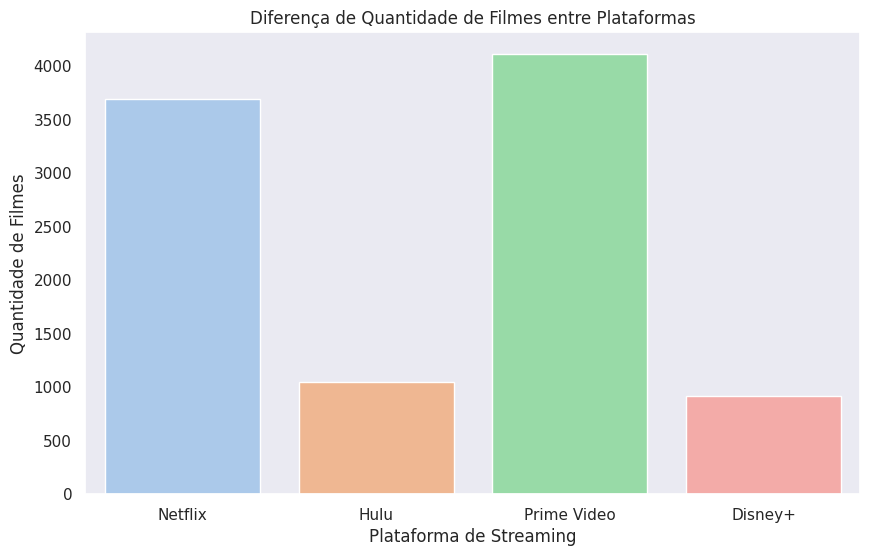

In [121]:
platform_counts = {
    "Netflix": len(dados_netflix),
    "Hulu": len(dados_hulu),
    "Prime Video": len(dados_prime_video),
    "Disney+": len(dados_disney_plus),
}
platforms = list(platform_counts.keys())
film_counts = list(platform_counts.values())

sns.set(style="dark")
plt.figure(figsize=(10, 6))
sns.barplot(x=platforms, y=film_counts, palette="pastel")
plt.xlabel('Plataforma de Streaming')
plt.ylabel('Quantidade de Filmes')
plt.title('Diferença de Quantidade de Filmes entre Plataformas')
plt.show()

In [122]:
filmes_netflix = dados_netflix[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
filmes_netflix

Netflix        3695
Hulu             39
Prime Video     109
Disney+           6
dtype: int64

In [123]:
filmes_hulu = dados_hulu[['Hulu', 'Netflix', 'Prime Video', 'Disney+']].sum()
filmes_hulu

Hulu           1047
Netflix          39
Prime Video      99
Disney+           6
dtype: int64

In [124]:
filmes_prime_video = dados_prime_video[['Prime Video', 'Hulu', 'Netflix', 'Disney+']].sum()
filmes_prime_video


Prime Video    4113
Hulu             99
Netflix         109
Disney+          13
dtype: int64

In [125]:
filmes_disney = dados_disney_plus[['Disney+', 'Hulu', 'Netflix', 'Prime Video']].sum()
filmes_disney

Disney+        922
Hulu             6
Netflix          6
Prime Video     13
dtype: int64

In [126]:
dados_disney_plus['Title']

270                              White Fang
712                     Muppets Most Wanted
1330                                 Zapped
1813                      The Blue Umbrella
2029                               Sky High
                       ...                 
9510                     Most Wanted Sharks
9511          Doc McStuffins: The Doc Is In
9512                  Ultimate Viking Sword
9513        Hunt for the Abominable Snowman
9514    Women of Impact: Changing the World
Name: Title, Length: 922, dtype: object

In [127]:
ano_hulu = dados_hulu[dados_hulu['Year'] == 2021]
ano_hulu.head()

,Title,Year,Netflix,Hulu,Prime Video,Disney+
3749,Nomadland,2021,0,1,0,0
3797,Boss Level,2021,0,1,0,0
3835,Barb & Star Go to Vista Del Mar,2021,0,1,0,0
3858,"Summer of Soul (...or, When the Revolution Cou...",2021,0,1,0,0
3876,"Quo vadis, Aida?",2021,0,1,0,0


In [128]:
open_api_key = 'API_KEY_HERE'
openai.api_key = open_api_key

In [129]:
filme_existe = any(dados_netflix['Title'] == "Roma")
if filme_existe:
    print("ok")

ok


In [149]:
netflix_dataset = dados_netflix
hulu_dataset = dados_hulu
prime_video_dataset = dados_prime_video
disney_dataset = dados_disney_plus
def pesquisar_filme(filme, dataset):
    filme_existe = any(dataset['Title'] == filme)
    if filme_existe:
        completion = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {
                    "role": "system",
                    "content": "Você é um especialista em filmes."
                },
                {
                    "role": "user",
                    "content": f"Crie uma sinopse para o filme {filme} (máximo 100 caracteres)!"
                },
            ]
        )

        print(f"Resumo/Sinopse do filme {filme}:")
        return completion.choices[0].message.content.strip('\"')
    else:
        resposta = input("Deseja pesquisar em outros datasets? (S/N): ")
        if resposta.upper() == 'S':
            outros_datasets = [netflix_dataset, hulu_dataset, prime_video_dataset, disney_dataset]
            for outro_dataset in outros_datasets:
                filme_existe_outro = any(outro_dataset['Title'] == filme)
                if filme_existe_outro:
                    print(f"Filme encontrado no dataset de {outro_dataset['Platform'].iloc[0]}.")
                    completion = openai.ChatCompletion.create(
                        model="gpt-3.5-turbo",
                        messages=[
                            {
                                "role": "system",
                                "content": f"Você é um especialista em filmes do {outro_dataset['Platform'].iloc[0]}."
                            },
                            {
                                "role": "user",
                                "content": f"Crie uma sinopse para o filme {filme} (máximo 100 caracteres)!"
                            },
                        ]
                    )
                    return completion.choices[0].message.content.strip('\"\n')
            print("Filme não encontrado em nenhum dataset.")
        else:
            return "Filme não encontrado."

In [150]:
def main():
    try:
        while True:
            print("\n\n===== Menu de Filmes =====")
            print("1. Pesquisar Filme")
            print("TODO - 2. Recomendação Aleatória")
            print("3. Sair")

            opcao = input("Escolha uma opção: ")

            if opcao == "1":
                clear_output(wait=True)
                print("Escolha a plataforma de streaming:")
                print("1. Netflix")
                print("2. Hulu")
                print("3. Prime Video")
                print("4. Disney+")

                plataforma_escolhida = input("Digite o número da plataforma: ")

                if plataforma_escolhida == "1":
                    plataforma = "Netflix"
                    dataset = netflix_dataset
                elif plataforma_escolhida == "2":
                    plataforma = "Hulu"
                    dataset = hulu_dataset
                elif plataforma_escolhida == "3":
                    plataforma = "Prime Video"
                    dataset = prime_video_dataset
                elif plataforma_escolhida == "4":
                    plataforma = "Disney+"
                    dataset = disney_dataset
                else:
                    print("Opção de plataforma inválida.")
                    continue

                filme_pesquisado = input("Digite o nome do filme que deseja pesquisar: ")
                resultado_pesquisa = pesquisar_filme(filme_pesquisado, dataset)
                print(resultado_pesquisa)

            elif opcao == "2":
                pass
            elif opcao == "3":
                print("Saindo do programa.")
                break
            else:
                print("Opção inválida. Por favor, escolha uma opção válida.")
    except KeyboardInterrupt:
        print("\nPrograma interrompido pelo usuário.")

if __name__ == "__main__":
    main()

Escolha a plataforma de streaming:
1. Netflix
2. Hulu
3. Prime Video
4. Disney+
Digite o número da plataforma: 1
Digite o nome do filme que deseja pesquisar: Roma
Resumo/Sinopse do filme Roma:
Uma empregada doméstica luta pela sobrevivência e amor em meio à agitação política e social da Cidade do México dos anos 1970.


===== Menu de Filmes =====
1. Pesquisar Filme
TODO - 2. Recomendação Aleatória
3. Sair
Escolha uma opção: 3
Saindo do programa.
